# Univariate Analysis On Categorical Columns
- Single variable

In [19]:
# Do the necessary imports
import pandas as pd

import matplotlib.pyplot as plt

## Load the data

In [20]:
# We load the pickle file so we have the correct data type

# Here I load the **pickle file** that was saved in previous steps
df = pd.read_pickle('data_MPG_clean.pkl')

 # Or start with CSV file
# df = pd.read_csv("data_MPG.csv") # or use this. CSV does not preserve data structures, types

In [21]:
# print 10 sample values

print(df.sample(10))

          mpg  cylinders  displacement  horsepower  weight  acceleration  \
390  32.00000          4           144          96    2665     13.898438   
107  18.00000          6           232         100    2789     15.000000   
225  17.50000          6           250         110    3520     16.406250   
354  34.50000          4           100         104    2320     15.796875   
384  32.00000          4            91          67    1965     15.703125   
228  18.50000          6           250          98    3525     19.000000   
37   18.00000          6           232         100    3288     15.500000   
88   14.00000          8           302         137    4042     14.500000   
100  18.00000          6           250          88    3021     16.500000   
248  36.09375          4            91          60    1800     16.406250   

     model_year  origin  
390          82   japan  
107          73     usa  
225          77     usa  
354          81  europe  
384          82   japan  
228    

In [22]:
# lets see data types and memory usage

print(df.info(memory_usage="deep"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float16 
 1   cylinders     398 non-null    uint8   
 2   displacement  398 non-null    int16   
 3   horsepower    398 non-null    uint8   
 4   weight        398 non-null    int16   
 5   acceleration  398 non-null    float16 
 6   model_year    398 non-null    int8    
 7   origin        398 non-null    category
dtypes: category(1), float16(2), int16(2), int8(1), uint8(2)
memory usage: 5.0 KB
None


## Categorical column 

In [31]:
# Lets print categorical columns

# cat_cols = df.select_dtypes(include='category').columns.tolist() # based on data type
cat_cols = ['origin', 'model_year', 'cylinders'] # manual

print(cat_cols)

['origin', 'model_year', 'cylinders']


## Which categories appear most / least?

In [24]:
# 1) lets see the stats on categorical column

cat_cols = ['origin', 'model_year', 'cylinders'] # manual

for col in cat_cols:
    print(df[col].value_counts())
    print("++++++++++++\n")

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64
++++++++++++

model_year
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64
++++++++++++

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64
++++++++++++



In [25]:
# 2) lets see the percent stats on categorical column
cat_cols = ['origin', 'model_year', 'cylinders'] # manual

for col in cat_cols:
    print(df[col].value_counts(normalize=True) * 100)
    print("++++++++++++\n")

origin
usa       62.562814
japan     19.849246
europe    17.587940
Name: proportion, dtype: float64
++++++++++++

model_year
73    10.050251
78     9.045226
76     8.542714
82     7.788945
75     7.537688
70     7.286432
79     7.286432
80     7.286432
81     7.286432
71     7.035176
72     7.035176
77     7.035176
74     6.783920
Name: proportion, dtype: float64
++++++++++++

cylinders
4    51.256281
8    25.879397
6    21.105528
3     1.005025
5     0.753769
Name: proportion, dtype: float64
++++++++++++



## Count plot for categorical columns

In [26]:
# Optional: Choose palette and font scale

plt.style.use("dark_background")  
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=["gold"])
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "lines.linewidth": 2.5
})


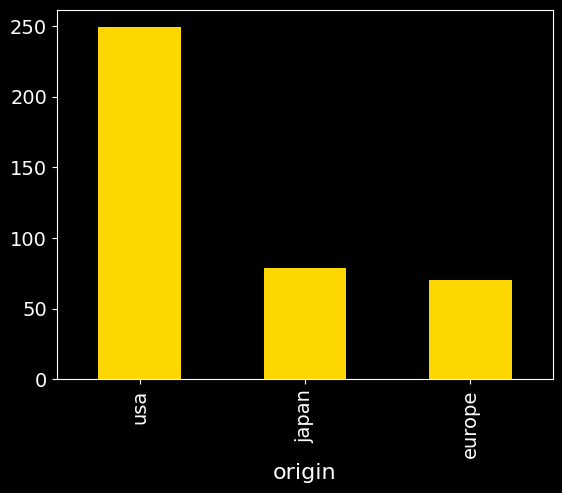

In [32]:
# 1) Do simple plot for only one column

col = "origin"

df[col].value_counts().plot(kind='bar')
plt.show()

In [33]:
# I want to see the raw numbers
col = 'origin'

count_data = df[col].value_counts().reset_index()
count_data.columns = [col, 'Count']
count_data['Percentage'] = 100 * count_data['Count'] / len(df)

# Print the data
print(f"Category counts and percentages for '{col}':")
print(count_data)
print("\n---------------------------------------------\n")

Category counts and percentages for 'origin':
   origin  Count  Percentage
0     usa    249   62.562814
1   japan     79   19.849246
2  europe     70   17.587940

---------------------------------------------



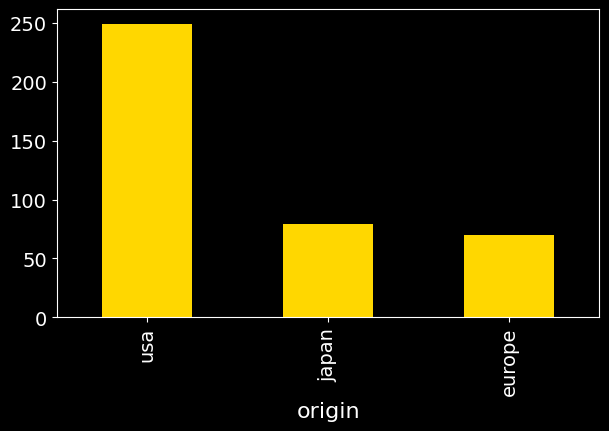

Category counts and percentages for 'origin':
   origin  Count  Percentage
0     usa    249   62.562814
1   japan     79   19.849246
2  europe     70   17.587940

---------------------------------------------



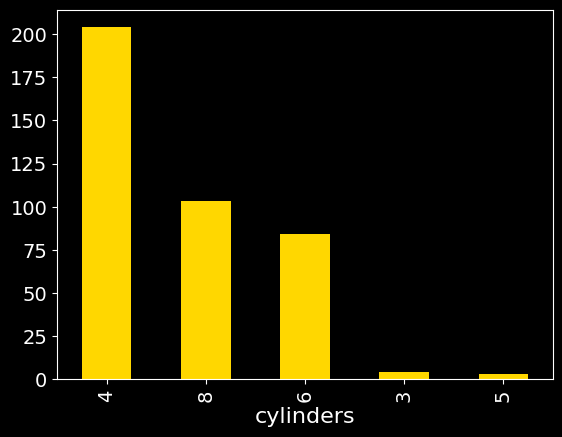

Category counts and percentages for 'cylinders':
   cylinders  Count  Percentage
0          4    204   51.256281
1          8    103   25.879397
2          6     84   21.105528
3          3      4    1.005025
4          5      3    0.753769

---------------------------------------------



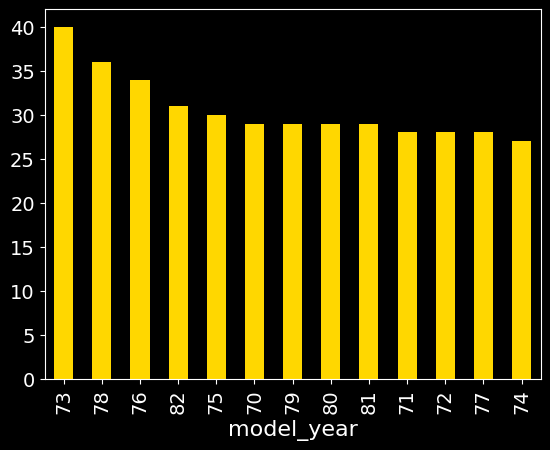

Category counts and percentages for 'model_year':
    model_year  Count  Percentage
0           73     40   10.050251
1           78     36    9.045226
2           76     34    8.542714
3           82     31    7.788945
4           75     30    7.537688
5           70     29    7.286432
6           79     29    7.286432
7           80     29    7.286432
8           81     29    7.286432
9           71     28    7.035176
10          72     28    7.035176
11          77     28    7.035176
12          74     27    6.783920

---------------------------------------------



In [34]:
# 2) Now do this for all columns individually or use for loop

plt.figure(figsize=(7, 4))

cat_columns = ['origin', 'cylinders', 'model_year']

for col in cat_columns:
        
    df[col].value_counts().plot(kind='bar')
    plt.show()
    
    # Compute the data to print
    count_data = df[col].value_counts().reset_index()
    count_data.columns = [col, 'Count']
    count_data['Percentage'] = 100 * count_data['Count'] / len(df)
    
    # Print the data
    print(f"Category counts and percentages for '{col}':")
    print(count_data)
    print("\n---------------------------------------------\n")


## Side Note

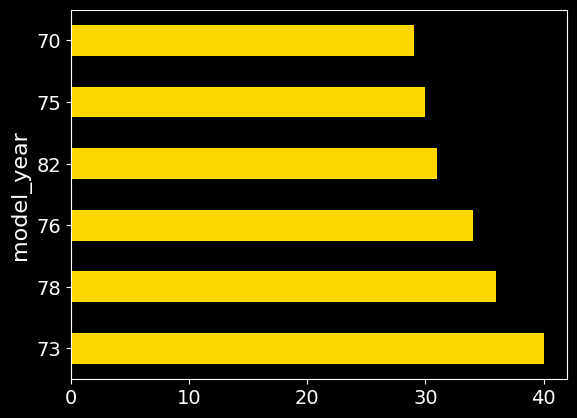

In [35]:
# Horizontal bar for high cardinality: Show only top 6 records

df['model_year'].value_counts().head(6).plot(kind='barh')
plt.show()

# STOP